# Regresión polinómica

Observamos anteriormente que la regresión lineal tiene problemas para ajustarse a datos con correlaciones no lineales:

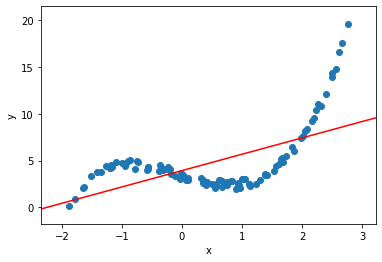

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100

np.random.seed(43)

X = np.expand_dims(np.linspace(-2, 2, n_samples), axis=1) + np.random.rand(n_samples,1)
y = 3 - 2 * X + X * X * X + np.random.rand(n_samples,1)

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='red')

plt.show()

La regresión polinómica consigue añadir curvatura al modelo elevando al cuadrado u otras potencias las variables independientes originales, construyendo un polinomio de grado $n$.

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n$$

`Sklearn` incluye `preprocessing.PolynomialFeatures`, que nos permite transformar cualquier conjunto de datos en uno con correlaciones polinómicas, pudiendo obtener a partir de $x_1$ y $x_2$ un polinomio de grado 3 como $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1 \cdot x_2$, $x_1^3$, $x_2^3$, $x_1^2 \cdot x_2$ y $x_1 \cdot x_2^2$, que da como resultado $x1$ y $x2$.<br><br>
Generemos un polinomio de grado 3 a partir del ejemplo anterior:

In [ ]:
# visualizamos los datos de ejemplo:
X

array([[-1.88494543],
       [-1.35052942],
       [-1.78580096],
       [-1.63819826],
       [-1.51124478],
       [-0.93884231],
       [-1.09148554],
       [-1.1760095 ],
       [-1.64775385],
       [-0.90261534],
       [-1.20100958],
       [-0.75350844],
       [-1.26073039],
       [-1.41786254],
       [-0.56769479],
       [-1.1729104 ],
       [-0.94854591],
       [-0.99703484],
       [-1.19606457],
       [-0.38909854],
       [-0.34298004],
       [-0.18005006],
       [-0.7257342 ],
       [-0.11621895],
       [-0.58454467],
       [-0.32017434],
       [-0.8669949 ],
       [-0.01199233],
       [-0.57068337],
       [-0.56597801],
       [-0.78274924],
       [-0.20427223],
       [-0.23147434],
       [-0.03029299],
       [ 0.35194151],
       [ 0.32280417],
       [ 0.36469853],
       [ 0.02020517],
       [-0.36062751],
       [-0.24332783],
       [ 0.56920184],
       [ 0.06851864],
       [ 0.56198682],
       [ 0.40955102],
       [ 0.40656357],
       [ 0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
poly_X

array([[-1.88494543e+00,  3.55301929e+00, -6.69724748e+00],
       [-1.35052942e+00,  1.82392972e+00, -2.46327074e+00],
       [-1.78580096e+00,  3.18908505e+00, -5.69507113e+00],
       [-1.63819826e+00,  2.68369354e+00, -4.39642208e+00],
       [-1.51124478e+00,  2.28386079e+00, -3.45147271e+00],
       [-9.38842307e-01,  8.81424877e-01, -8.27518965e-01],
       [-1.09148554e+00,  1.19134069e+00, -1.30033115e+00],
       [-1.17600950e+00,  1.38299836e+00, -1.62641921e+00],
       [-1.64775385e+00,  2.71509276e+00, -4.47380455e+00],
       [-9.02615340e-01,  8.14714452e-01, -7.35373762e-01],
       [-1.20100958e+00,  1.44242401e+00, -1.73236505e+00],
       [-7.53508437e-01,  5.67774965e-01, -4.27823226e-01],
       [-1.26073039e+00,  1.58944111e+00, -2.00385672e+00],
       [-1.41786254e+00,  2.01033418e+00, -2.85037752e+00],
       [-5.67694793e-01,  3.22277379e-01, -1.82955190e-01],
       [-1.17291040e+00,  1.37571880e+00, -1.61359489e+00],
       [-9.48545905e-01,  8.99739335e-01

Y si entrenamos el modelo con estos datos, ya no obtendremos una recta:

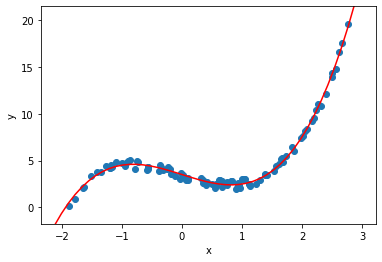

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(poly_X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x).reshape(-1, 1)
xs = PolynomialFeatures(degree=3, include_bias=False).fit_transform(line)
ys = reg.predict(xs)

plt.plot(xs[:,0], ys, c='red')

plt.show()

# ¿Cómo podemos medir la calidad de un modelo?

Se suele medir por la proporción de la varianza que explica, es en adelante $R^2$, que puede tomar valores entre 0 y 1 incluidos. A mayor $R^2$, mejor será el modelo, porque significa que explica una mayor parte de la varianza.<br><br>
Existen otras métricas como:

* **Mean Absolute Error (MAE)** es la media de los valores absolutos de los errores
$$\frac{1}{n}\sum^{n}_{i=1}\left | y_i - \widehat{y}_i  \right |$$

* **Mean Squared Error (MSE)** es la media de los cuadrados de los errores
$$\frac{1}{n}\sum^{n}_{i=1}\left ( y_i - \widehat{y}_i  \right )^2$$

* **Root Mean Squared Error (RMSE)** es la raíz cuadrada de la media de los errores al cuadrado
$$\sqrt{\frac{1}{n}\sum^{n}_{i=1}\left ( y_i - \widehat{y}_i  \right )^2}$$

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

X, y = load_boston(return_X_y=True)

ridge = Ridge(alpha=1.0).fit(X, y)

y_pred = ridge.predict(X)

print("MAE: ", mean_absolute_error(y, y_pred))
print("MSE: ", mean_squared_error(y, y_pred))
print("RMSE: ", mean_squared_error(y, y_pred, squared=False))
print("R2: ", ridge.score(X, y))

MAE:  3.264573955164436
MSE:  22.04445224308819
RMSE:  4.695151993608747
R2:  0.7388703133867616


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

El MAE suele ser el error más interpretable, al no estar elevado al cuadrado (obtendríamos el error en $€^2$), y es recomendable fijarse en él junto con $R^2$ para obtener una interpretación más profunda de los resultados.

# Evaluación rigurosa de modelos

Para realizar una evaluación más rigurosa de los modelos, se puede serparar el dataset de entrenamiento mediante un muestreo aleatorio para **evitar sesgos**.<br>
Este proceso se conoce como cross-validation (validación cruzada) o K-fold cross-validation.

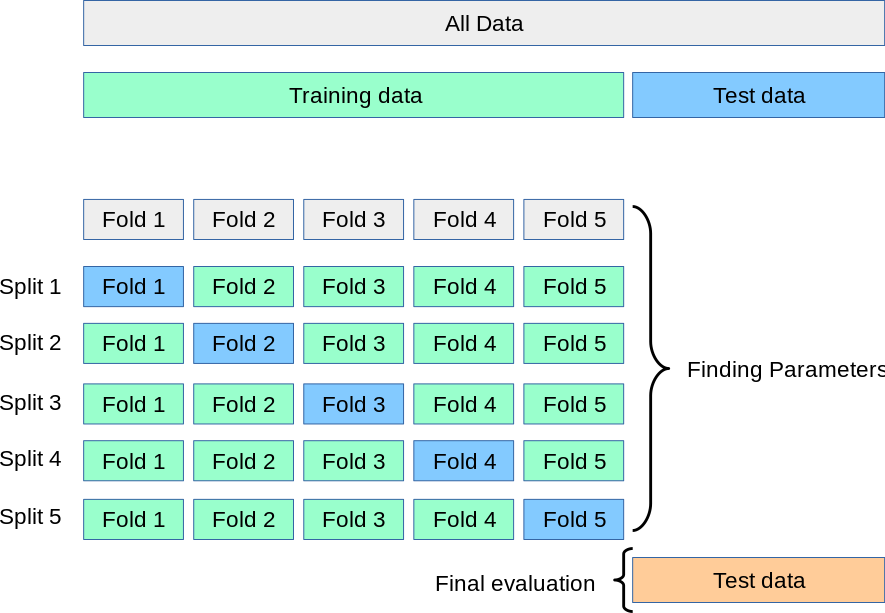

Implementación de ejemplo con `sklearn`:

In [7]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X, y = load_boston(return_X_y=True)
ridge = Ridge(alpha=1)

cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([-11.7110334 , -23.58316804, -29.69339407, -80.22988232,
       -31.11617767])

Conviene explorar la documentación para conocer más métricas que se pueden implementar https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Fuentes:
* https://www.cienciadedatos.net/documentos/25_regresion_lineal_multiple
* https://www.cienciadedatos.net/documentos/32_metodos_de_regresion_no_lineal_polinomica_splines_gams.html#Regresi%C3%B3n_no_lineal_con_un_%C3%BAnico_predictor

Ejemplos obtenidos del material creado por los profesores **Fernando Ortega** (fernando.ortega@upm.es) y **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">